# Overall

```
- 프로젝트명 : 온라인 화장품 shop 고객분석
- 프로젝트유형 : 데이터 EDA 및 인사이트 도출
- 시나리오 : 온라인 화장품 몰 판매 전략 개선 목적의 행동 패턴과 선호도 분석
- 문제정의 :
    - 고객 이해에 대한 정보 부족
    - Q1. 어떤 제품 또는 브랜드가 가장 인기가 있을까?
    - Q2. 고객들이 카트에 담았으나 구매하지 않는 제품들은 무엇일까?
    - Q3. 구매 전환률을 높이기 위한 전략은 무엇일까?
- 기대효과 :
    - 매출 증대와 높은 고객 만족도를 달성
    - 효과적인 마케팅 전략 수립
    - 재고 관리 및 제품 전략의 효율화
- 해결방안 :
    - 데이터를 통한 고객의 제품 및 브랜드 선호도 파악
    - 카트에 담기만 하고 구매되지 않는 제품들의 공통점 분석
    - 구매 전환률을 높일 수 있는 마케팅 전략 제안
- 성과측정 :
    - 구매 전환률의 증가
    - 고객 만족도 조사를 통한 평가
    - 매출 증대 및 재구매율 증가
- 운영방향 :
    - 주기적으로 데이터를 수집하고 분석하여 전략을 수정 및 적용
    - 고객의 피드백을 수집하여 서비스 개선
    - 새로운 제품 또는 브랜드의 반응을 모니터링하여 전략 반영

- 분석결과 / 제안
- 상품별 Conversion Rate 분석
	- 가장 높은 전환율을 가진 'product_id' : 5809912, 5809911, 5809910, 5649236, 5909810 순

- 시간대별 행동 패턴분석
	- 가장 높은 전환율을 보인 시간대 : 11, 10, 07, 09, 08 시 순

- 사용자행동 패턴 분석
	- 반복 행동이 높은 편 (→ 습관성 탐색 or 망설임)
        remove_from_cart → remove_from_cart
        cart → cart
        view → view
    - 사용자가 제품을 담았다가 반복적으로 제거 → 구매 주저 또는 의도적 비교
        - cart → cart : 계획된 대량 구매 or 장바구니 저장용도 의도로 예상
    - 제안
        - 상품 비교 기능 제공, 빠른 장바구니 확인 UI 개선을 통해 의사결정 시간 단축 도모

- 구매(purchase) 전환이 적음
    - cart → purchase, view → purchase, remove_from_cart → purchase는 모두 낮은 위치
    - purchase → purchase는 반복 구매지만 상대적으로 그 수는 낮음
    - 전환 퍼널 개선 필요, view/cart 단계에서는 활성도가 높지만 실제 구매 전환은 낮음
        - 마케팅 또는 UX 측면에서 전환 유도 전략 필요
    - 제안
        - 타겟 할인, 리마인드 알림, 후기 강조
        - 이탈 가능성 높은 행동

    - remove_from_cart → view, view → remove_from_cart, cart → remove_from_cart 등
        - 사용자가 장바구니를 비우고 다시 상품을 탐색하는 흐름
        - 구매 의사 취소 또는 탐색의 혼란, 가격 민감도, 리뷰 부족 등이 원인일 수 있음
        - 리마인드 메시지, 할인 제안, 보상형 푸시알림 등 이탈 방지 전략 고려
    - 제안
        - 전환 개선 캠페인(A/B test), 1-click 구매 기능 도입
        - 선순환 흐름 구조 미비

    - 우리가 기대하는 자연스러운 구매 흐름 view → cart → purchase는 전반적으로 빈도가 낮음
        - view → cart는 상대적으로 높지만, cart → purchase는 아래쪽에 있음
    - 제안
        - 고가치 고객 세분화 후 리워드 제공

- Meta data
    - event_time : 이벤트가 발생한 시간  
    - event_type : 이벤트 유형 (‘view’, ‘cart’, ‘remove_from_cart’, ‘purchase’)  
    - product_id : 제품 ID  
    - category_id : 제품 카테고리 ID  
    - category_code : 의미 있는 카테고리 이름 (있는 경우)  
    - brand : 브랜드 이름 (소문자)  
    - price : 제품 가격  
    - user_id : 사용자 ID  
    - user_session : 사용자 세션 ID  

```
<!--
https://colab.research.google.com/drive/19hmq7QrIv7TtQC_6Pi0GsF5_MtPfI8W8#scrollTo=qh1toDAKck-P
https://colab.research.google.com/drive/1AhkZwKKQ9blgD9HEyb61uEfZiLwhLjfk
 -->

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')


In [2]:
# pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# 공학적 표기법 > 실수 옵션
pd.set_option('display.float_format', '{:.2f}'.format)

# Data read
df = pd.read_csv('S_PJT11_DATA.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [3]:
# Data 형태 확인
# 3,533,286 row, 9 col로 구성됨
print('df', df.shape)

df (3533286, 9)


In [4]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [5]:
# Null 값 확인
# category_code, brand, user_session
print(df.isnull().sum())

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64


In [6]:
# Null value 다른 값으로 치환
df['category_code'].fillna('None', inplace = True)
df['brand'].fillna('None', inplace = True)
df['user_session'].fillna('None', inplace = True)

In [7]:
# Outlier 확인
df.describe()

,product_id,category_id,price,user_id
count,3533286.00,3533286.00,3533286.00,3533286.00
mean,5473053.80,1555023012945680128.00,8.87,522331835.07
std,1331331.39,168926187070693152.00,19.86,84948189.60
min,3752.00,1487580004807082752.00,-79.37,1180452.00
25%,5726191.00,1487580006300255232.00,2.06,486682994.00
50%,5811429.00,1487580008447738880.00,4.21,556649586.00
75%,5859462.00,1487580013581566208.00,7.14,582801855.00
max,5917178.00,2235524499636224256.00,327.78,595414541.00


In [28]:
df.describe(include = 'object')

,event_time,event_type,category_code,brand,user_session,hour
count,3533286,3533286,3533286,3533286,3533286,3533286
unique,1654771,4,11,253,839813,24
top,2019-12-02 14:12:08 UTC,view,None,None,d53d1c2e-9195-6051-cf7b-7332dfeae818,19
freq,260,1728331,3474821,1510289,1393,230707


## **🔉Process01**  
---

###전체 이벤트 유형별 발생 횟수
---

In [8]:
# 이벤트 타입 횟수
event_counts = df['event_type'].value_counts()
event_counts

,count
event_type,
view,1728331
cart,927124
remove_from_cart,664655
purchase,213176


### 단계별 이탈률

In [31]:
# 각 단계에서의 이탈률 계산
view_to_cart_dropout = round((event_counts['view'] - event_counts['cart']) / event_counts['view'] * 100, 2)
cart_to_purchase_dropout = round((event_counts['cart'] - event_counts['purchase']) / event_counts['cart'] * 100, 2)
cart_to_remove_dropout = round((event_counts['remove_from_cart']) / event_counts['cart'] * 100, 2)

dropout_rates = {
    'View to Cart Dropout Rate (%)': view_to_cart_dropout,
    'Cart to Purchase Dropout Rate (%)': cart_to_purchase_dropout,
    'Cart to Remove Dropout Rate (%)': cart_to_remove_dropout
}

dropout_rates

{'View to Cart Dropout Rate (%)': np.float64(46.36),
 'Cart to Purchase Dropout Rate (%)': np.float64(77.01),
 'Cart to Remove Dropout Rate (%)': np.float64(71.69)}

###판매량 TOP 10
---

In [10]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,None,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,None,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,None,None,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [11]:
# 가장 많이 판매된 상품 TOP 10 계산
# product_id 기준
top_sold_products = df[df['event_type'] == 'purchase']['product_id'].value_counts().sort_values(ascending= False).head(10)
top_sold_products

,count
product_id,
5809910,1659
5854897,786
5802432,714
5700037,621
5809912,620
5833330,594
5304,549
5751422,548
5815662,521


In [35]:
# 가장 많이 판매된 상품 TOP 10 계산 (NA가 많아 의미가 없음)
# category 기준 None 제외
top_sold_products = df[df['event_type'] == 'purchase']['category_code'].value_counts(dropna=False)[1:].head(20)
top_sold_products

,count
category_code,
stationery.cartrige,984
apparel.glove,771
appliances.environment.vacuum,636
furniture.bathroom.bath,183
accessories.bag,42
furniture.living_room.cabinet,40
accessories.cosmetic_bag,34
appliances.personal.hair_cutter,14
appliances.environment.air_conditioner,2


###매출 TOP 10
---

In [13]:
# 상품별 매출 계산
# sales 컬럼 생성, 구매이면 1, else 0, 구매인 경우의 df['price'] * df['event_type'] 값만 도출되게 된다
df['sales'] = df['price'] * df['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)

# 가장 많은 매출을 기록한 상품 TOP 10
# product_id 기준
top_sales_products = df.groupby('product_id').sum()['sales'].sort_values(ascending=False).head(10)
top_sales_products

,sales
product_id,
5850281,10471.28
5560754,10110.88
5809910,8693.16
5751422,6000.60
5751383,4489.20
5877454,4473.29
5909810,4326.63
5846437,4297.80
5792800,4066.08


###브랜드별 판매량 및 매출
---

In [38]:
# 브랜드별 판매량 계산
brand_sales_count = df[df['event_type'] == 'purchase'].groupby('brand').size() # size는 행의 수 count

# 브랜드별 매출 계산
brand_sales_revenue = df[df['event_type'] == 'purchase'].groupby('brand').sum()['sales']
# df[df['event_type'] == 'purchase'].groupby('brand').sum()['sales'] # 전체 그룹의 모든 수치형 컬럼을 먼저 sum() → 그 후 sales만 선택, 느림
# df[df['event_type'] == 'purchase'].groupby('brand')['sales'].sum() # 오직 'sales' 컬럼만 가지고 그룹별 sum(), 빠름

brand_sales = pd.DataFrame({
    'Sales Count': brand_sales_count,
    'Sales Revenue': brand_sales_revenue
}).sort_values(by='Sales Revenue', ascending=False)

brand_sales.head(10)

,Sales Count,Sales Revenue
brand,,
None,91695,440207.57
runail,18199,58177.26
grattol,8171,43793.50
irisk,10583,35291.51
uno,2780,29084.76
estel,4116,24474.19
jessnail,1823,24075.00
strong,120,22266.41
masura,6985,19809.19


In [40]:
# None 제외하고 출력
# brand_sales.iloc[1:, :]

,Sales Count,Sales Revenue
brand,,
runail,18199,58177.26
grattol,8171,43793.50
irisk,10583,35291.51
uno,2780,29084.76
estel,4116,24474.19
...,...,...
andrea,1,5.54
cosima,4,4.76
skinity,1,4.44


### 사용자별 평균 구매 횟수
---

In [15]:
# 사용자별 구매 횟수 계산
user_purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()

# 사용자별 평균 구매 횟수 계산
average_purchase_per_user = user_purchase_counts.mean()

# average_purchase_per_user 그대로 표기하면 np 형태 그대로 나오게 됩니다. 희망하는 출력 방식으로는 f string, print
print(f"{average_purchase_per_user:.2f}")

8.32


## **🔊Process02**  
**┗ 판매전략 개선**  
---



###상품별 Conversion Rate 분석
---

In [42]:
# 상품별 조회, 장바구니 추가, 구매 데이터 계산
# size : row 개수
# count : non-NA 값의 개수
product_events = df.groupby(['product_id', 'event_type']).size().unstack().fillna(0)

# 구매 전환률 계산: 구매수 / 조회수
product_events['conversion_rate'] = product_events['purchase'] / product_events['view'] * 100

# 상품별 조회수가 10회 이상인 상품들만 필터링하여 전환률 TOP 10 확인
top_conversion_products = product_events[product_events['view'] >= 10].sort_values(by=['view', 'conversion_rate'], ascending=[False, True]).head(10)

top_conversion_products[['view', 'cart', 'purchase', 'conversion_rate']].sort_values(by = 'conversion_rate', ascending = False)

# 가장 높은 전환율을 가진 'product_id' : 5809912, 5809911, 5809910, 5649236, 5909810

event_type,view,cart,purchase,conversion_rate
product_id,,,,
5809912,5944.00,2634.00,620.00,10.43
5809911,4307.00,1757.00,386.00,8.96
5809910,24419.00,6513.00,1659.00,6.79
5649236,4372.00,621.00,148.00,3.39
5909810,8473.00,675.00,231.00,2.73
5886282,5488.00,459.00,90.00,1.64
5877454,6621.00,519.00,101.00,1.53
5856186,4015.00,245.00,42.00,1.05
5769877,4100.00,188.00,27.00,0.66


###시간대별 행동 패턴분석
---

In [43]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales,hour
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,None,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,0.00,00
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,None,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,0.00,00
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,None,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,0.00,00


In [17]:
# event_time에서 시간대 정보 추출
df['hour'] = df['event_time'].astype(str).str[11:13]
# df.info()

In [18]:
df['hour'].value_counts().sort_index()

,count
hour,
00,36690
01,30674
02,33622
03,45998
04,67176
05,102487
06,135963
07,161473
08,180581


In [19]:
# event_time에서 시간대 정보 추출
df['hour'] = df['event_time'].astype(str).str[11:13]

# 시간대별 이벤트 유형별 발생 횟수 계산
# na 값은 0으로 대치합니다.
hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# 시간대별 구매 전환률 계산: 구매수 / 조회수

hourly_events['conversion_rate'] = hourly_events['purchase'] / hourly_events['view'] * 100

hourly_events[['view', 'cart', 'purchase', 'conversion_rate']]

event_type,view,cart,purchase,conversion_rate
hour,,,,
00,17823,9948,2003,11.24
01,14194,8514,1648,11.61
02,15270,9861,1995,13.06
03,21451,12576,2734,12.75
04,32463,18002,3321,10.23
05,48661,27936,6068,12.47
06,65981,35209,8496,12.88
07,79501,41389,10871,13.67
08,88832,46343,11884,13.38


In [89]:
# gradient 시각화
styled_all_columns = hourly_events.style.background_gradient(cmap='coolwarm', subset=['conversion_rate'])
styled_all_columns

event_type,cart,purchase,remove_from_cart,view,conversion_rate
hour,,,,,
00,9948,2003,6916,17823,11.238288
01,8514,1648,6318,14194,11.610540
02,9861,1995,6496,15270,13.064833
03,12576,2734,9237,21451,12.745327
04,18002,3321,13390,32463,10.230108
05,27936,6068,19822,48661,12.469945
06,35209,8496,26277,65981,12.876434
07,41389,10871,29712,79501,13.674042
08,46343,11884,33522,88832,13.378062


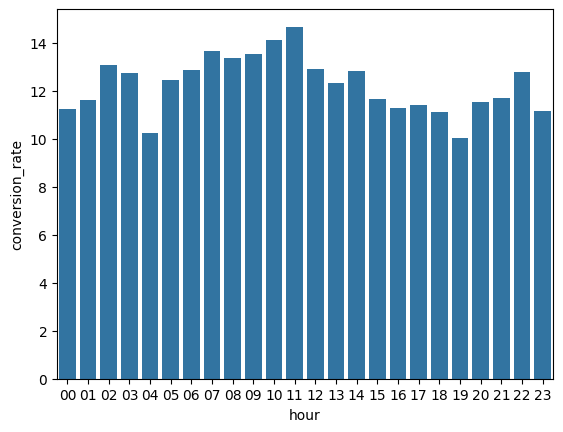

In [97]:
import seaborn as sns
sns.barplot(data = hourly_events, x = hourly_events.index, y = hourly_events['conversion_rate']);


In [99]:
hourly_events.sort_values(by = 'conversion_rate', ascending = False).head(5)

# 11, 10, 07, 09, 08 시 순으로 전환율 높은 시간대로 확인

event_type,cart,purchase,remove_from_cart,view,conversion_rate
hour,,,,,
11,54671,14850,40912,101215,14.67
10,52668,13894,37037,98463,14.11
07,41389,10871,29712,79501,13.67
09,48569,12642,34700,93496,13.52
08,46343,11884,33522,88832,13.38


In [21]:
hourly_events.columns

Index(['cart', 'purchase', 'remove_from_cart', 'view', 'conversion_rate'], dtype='object', name='event_type')

###사용자 행동 패턴분석
---

In [22]:
# 행동패턴 분석을 위한 Sorting
data_sorted = df.sort_values(['user_session', 'event_time'])
data_sorted.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,sales,hour
2562634,2019-12-20 20:37:29 UTC,view,5835086,1924049106385240809,None,None,5.71,586931185,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,0.00,20
2563811,2019-12-20 20:50:05 UTC,view,5835086,1924049106385240809,None,None,5.71,586931185,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,0.00,20
2246227,2019-12-18 06:48:39 UTC,remove_from_cart,5875358,2084144451428549153,None,None,2.05,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.00,06
2246359,2019-12-18 06:50:18 UTC,cart,5891029,1605161575889502297,None,irisk,5.24,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.00,06
2246404,2019-12-18 06:50:37 UTC,cart,5890841,1605161575889502297,None,irisk,4.44,531784651,00002b0e-d7f7-454e-8386-431c4021a9f6,0.00,06


In [68]:
# styled_all_columns.index.tolist()

# Data가 너무 크므로 특정 시간만 가져오기
df_hour = df[df['hour'].isin(['11'])]
df_hour['event_time'] = pd.to_datetime(df_hour['event_time']) # pd.to_datetime으로 dt형식으로 변경
data_sorted = df_hour.sort_values(['user_session', 'event_time'])

# 세션별 이벤트 유형의 순서를 문자열로 만들기
# 각 user_session별로 발생한 event_type들을 시간 순으로 이어붙인 문자열 생성
# .transform(lambda x: '->'.join(x)), 해당 세션의 모든 이벤트를 하나의 문자열로 이어붙임

data_sorted['event_sequence'] = data_sorted.groupby('user_session')['event_type'].transform(lambda x: '->'.join(x))

# 각 경로의 빈도 파악
# user_session 의 중복값을 제거하고, event_sequence 값의 value_counts를 진행
user_patterns = data_sorted.drop_duplicates('user_session')['event_sequence'].value_counts()
user_patterns


,count
event_sequence,
view,36562
view->view,3691
view->view->view,1435
view->cart,1341
cart,966
...,...
view->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart->cart,1
cart->cart->remove_from_cart->remove_from_cart->cart->cart->cart->view->cart->cart,1
remove_from_cart->cart->remove_from_cart,1


In [73]:
user_patterns = user_patterns.reset_index()
user_patterns

,event_sequence,count
0,view,36562
1,view->view,3691
2,view->view->view,1435
3,view->cart,1341
4,cart,966
...,...,...
5895,view->cart->cart->cart->cart->cart->cart->cart...,1
5896,cart->cart->remove_from_cart->remove_from_cart...,1
5897,remove_from_cart->cart->remove_from_cart,1
5898,remove_from_cart->view->view->view->remove_fro...,1


In [74]:
from collections import Counter

def extract_transitions(seq):
    steps = seq.split('->')
    return list(zip(steps[:-1], steps[1:]))

# 전체 전이 쌍 모으기
all_transitions = []
for seq in user_patterns['event_sequence'].dropna():
    all_transitions.extend(extract_transitions(seq))

# 빈도 집계
transition_counts = Counter(all_transitions)
transition_df = pd.DataFrame(transition_counts.items(), columns=['transition', 'count']).sort_values(by='count', ascending=False)


In [76]:
transition_df.head()

,transition,count
4,"(remove_from_cart, remove_from_cart)",27539
2,"(cart, cart)",27167
0,"(view, view)",18971
7,"(purchase, purchase)",10660
1,"(view, cart)",9147


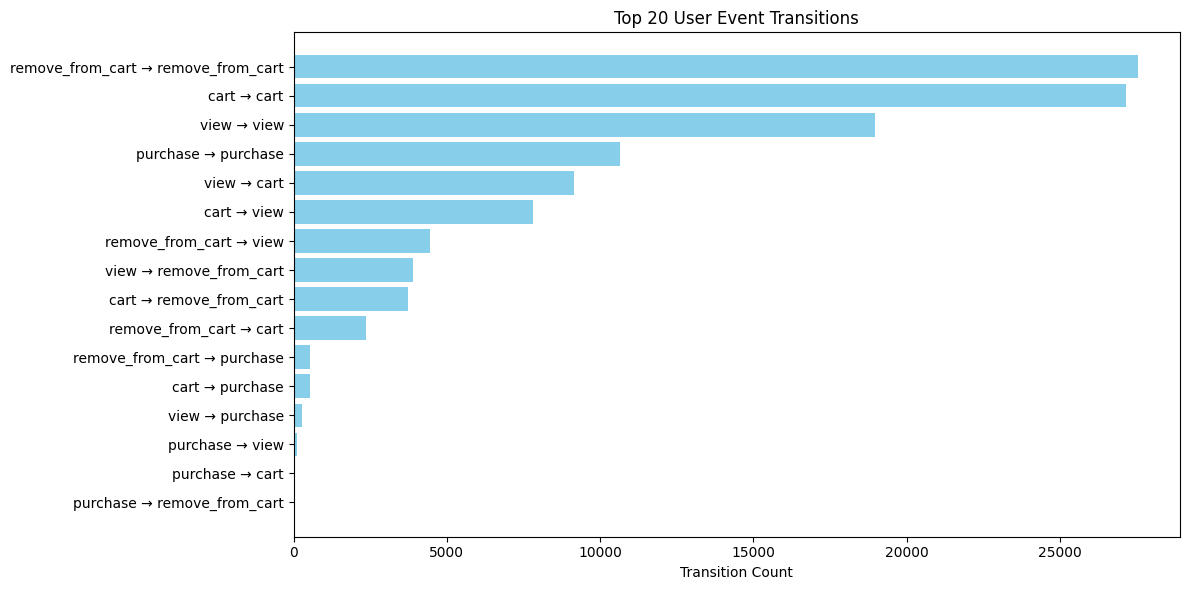

In [78]:
import matplotlib.pyplot as plt

# 상위 20개 전이 쌍 추출
top_transitions = transition_df.head(20)

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(
    [f"{a} → {b}" for a, b in top_transitions['transition']],
    top_transitions['count'],
    color='skyblue'
)
plt.xlabel("Transition Count")
plt.title("Top 20 User Event Transitions")
plt.gca().invert_yaxis()  # 상위 항목을 위로
plt.tight_layout()
plt.show()


- 반복 행동이 높은 편 (→ 습관성 탐색 or 망설임)
    - remove_from_cart → remove_from_cart
    - cart → cart
    - view → view
        - 사용자가 제품을 담았다가 반복적으로 제거 → 구매 주저 또는 의도적 비교
        - cart → cart : 계획된 대량 구매 or 장바구니 저장용도 의도로 예상
    - 제안
        - 상품 비교 기능 제공, 빠른 장바구니 확인 UI 개선을 통해 의사결정 시간 단축 도모

- 구매(purchase) 전환이 적음
    - cart → purchase, view → purchase, remove_from_cart → purchase는 모두 낮은 위치
    - purchase → purchase는 반복 구매지만 상대적으로 그 수는 낮음
        - 전환 퍼널에 문제가 있음: view/cart 단계에서는 활성도가 높지만 실제 구매 전환은 낮음
        - 마케팅 또는 UX 측면에서 전환 유도 전략 필요
    - 제안
        - 타겟 할인, 리마인드 알림, 후기 강조

- 이탈 가능성 높은 행동
    - remove_from_cart → view, view → remove_from_cart, cart → remove_from_cart 등
    - 사용자가 장바구니를 비우고 다시 상품을 탐색하는 흐름
        - 구매 의사 취소 또는 탐색의 혼란, 가격 민감도, 리뷰 부족 등이 원인일 수 있음
        - 리마인드 메시지, 할인 제안, 보상형 푸시알림 등 이탈 방지 전략 고려
    - 제안
        - 전환 개선 캠페인(A/B test), 1-click 구매 기능 도입

- 선순환 흐름 구조 미비
    - 우리가 기대하는 자연스러운 구매 흐름 view → cart → purchase는 전반적으로 빈도가 낮음
    - view → cart는 상대적으로 높지만, cart → purchase는 아래쪽에 있음
    - 제안
        - 고가치 고객 세분화 후 리워드 제공



In [100]:
# sankey chart
# import plotly.graph_objects as go

# # 상위 N개의 전이쌍 선택
# top_n = 20
# top_pairs = transition_df.head(top_n)

# # 노드 리스트 생성
# nodes = sorted(set([src for src, tgt in top_pairs['transition']] + [tgt for src, tgt in top_pairs['transition']]))
# node_indices = {node: idx for idx, node in enumerate(nodes)}

# # 링크 구성
# sources = [node_indices[src] for src, tgt in top_pairs['transition']]
# targets = [node_indices[tgt] for src, tgt in top_pairs['transition']]
# values = top_pairs['count'].tolist()

# # Sankey 그리기
# fig = go.Figure(data=[go.Sankey(
#     node=dict(
#         pad=15,
#         thickness=20,
#         line=dict(color="black", width=0.5),
#         label=nodes,
#         color="lightgray"
#     ),
#     link=dict(
#         source=sources,
#         target=targets,
#         value=values
#     )
# )])

# fig.update_layout(title_text="User Event Flow (Sankey Diagram)", font_size=12)
# fig.show()
